# План работы:
1. Изучить общую информацию
2. Подготовить данные
3. Провести исследовательский анализ данных
- Посмотреть, сколько игр выпускалось в разные годы. 
- Посмотреть, как менялись продажи по платформам.
- Возять данные за актуальный период.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 
- Соотнесити выводы с продажами игр на других платформах.
- Просмотреть на общее распределение игр по жанрам.
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.simplefilter('ignore')
data = pd.read_csv('/datasets/games.csv')
data.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5580,OverBlood,PS,1996.0,Action,0.05,0.04,0.21,0.02,NaN,NaN,NaN
4584,Superman: Shadow of Apokolips,PS2,2002.0,Action,0.21,0.16,0.00,0.05,64.0,7.2,E
7808,Quantum Theory,PS3,2010.0,Shooter,0.05,0.09,0.02,0.03,43.0,5.3,M
12926,Defendin' De Penguin,Wii,2008.0,Strategy,0.05,0.00,0.00,0.00,NaN,NaN,NaN
15655,Super Dodge Ball,NG,1995.0,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13612,Twilight Syndrome: Kinjiratera Toshi Densetsu,DS,2008.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
6409,Are You Smarter than a 5th Grader? Game Time,Wii,2009.0,Puzzle,0.25,0.00,0.00,0.02,NaN,tbd,E
1377,Dead Space,X360,2008.0,Action,0.89,0.39,0.00,0.13,89.0,8.7,M
9209,Age of Empires: Collector's Edition,PC,2000.0,Strategy,0.02,0.10,0.00,0.02,NaN,8,T
14089,Just Dance 2017,XOne,2016.0,Misc,0.03,0.00,0.00,0.00,75.0,8,E10+


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив общую информацию видно, что в столбцах с оценками и рейтингом очень много пропусков, так же видны пропуски в названии игр и годах выпуска

## Подготовка данных

In [3]:
data.columns = data.columns.str.lower() #приведение к нижнему регистру названий столбцов

In [4]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data = data.dropna(subset=["name"]).reset_index(drop=True)
data = data.dropna(subset=["year_of_release"]).reset_index(drop=True) 
#удаление строк c пропусками в столбцах: "название игры" и "год выпуска",так как подобрать замену подобрать невозможно,

In [6]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [7]:
data['na_sales'] = round(data['na_sales'],1) # округлили продажы до десятых для удобства работы
data['eu_sales'] = round(data['eu_sales'],1)
data['jp_sales'] = round(data['jp_sales'],1)
data['other_sales'] = round(data['other_sales'],1)

In [8]:
data.isna().sum() # подсчёт пропусков

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [9]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].fillna('RP')
data['rating'] = data['rating'].replace('AO', 'M')
data['rating'] = data['rating'].replace('EC', 'E')
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+'], dtype=object)

In [10]:
columns_to_replace=['critic_score','user_score']
for columns in columns_to_replace:
    data[columns] = pd.to_numeric(data[columns], errors='coerce')

In [11]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [12]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.4,29.0,3.8,8.4,76.0,8.0,E,82.6
1,Super Mario Bros.,NES,1985,Platform,29.1,3.6,6.8,0.8,NaN,NaN,RP,40.3
2,Mario Kart Wii,Wii,2008,Racing,15.7,12.8,3.8,3.3,82.0,8.3,E,35.6
3,Wii Sports Resort,Wii,2009,Sports,15.6,10.9,3.3,3.0,80.0,8.0,E,32.8
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.3,8.9,10.2,1.0,NaN,NaN,RP,31.4


 Вывод:
- Заменили названия столбцов;
- Преобразовать данные в нужные типы. Столбец с годом выпуска привели к типу "int" для удобста работы, столбцы с продажами в миллионах округлили до десятых за ненадобностью излишней точности.
- Пропуски в столбцых с названием игры и годом выпуска удалили за ограниченностью информации, пропуски в столбцах с рейтингом  "tbd" - подлежит уточнению заменили на "NaN". К пропуску в столбцах с рейтином могло привести , то что данные игры уже не являются актуальными (старые по годам игры, возможно рейтинг как таковой не велся в тех годах или просто не дошел до нашей таблицы). Рейтинг пропущенные знаечния заменим на "RP" - ожидает оценки, K-A это старое название рейтинга E, также рейтинг только для взрослых и для взрослых(АО и М) заменим на М, тоже самое сделаем для детей и для любого возраста(Е, ЕС)
- Подсчитаны суммарные продажи во всех регионах и записаны в отдельный столбец "sum_sales".

## Исследовательский анализ

Посмотрем сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 

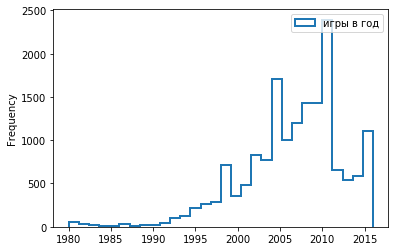

In [14]:
data['year_of_release'].plot(kind = 'hist', histtype = 'step', bins = 30, linewidth = 2, alpha = 1, label = 'игры в год', legend = True)

График показывает колличество игр выпускаемых в тот или иной год.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [15]:
data_piv = data.pivot_table(index = ['platform'], values = ['sum_sales'], aggfunc = ['sum'])

In [16]:
data_piv.columns=['sum_sales']
data_piv = data_piv.sort_values(by="sum_sales", ascending = False)
data_piv

,sum_sales
platform,
PS2,1195.2
X360,937.2
PS3,911.4
Wii,869.4
DS,768.2
PS,702.1
PS4,306.1
GBA,297.6
PSP,272.8


Text(0, 0.5, 'Сумма заработанных средств\nмлн')

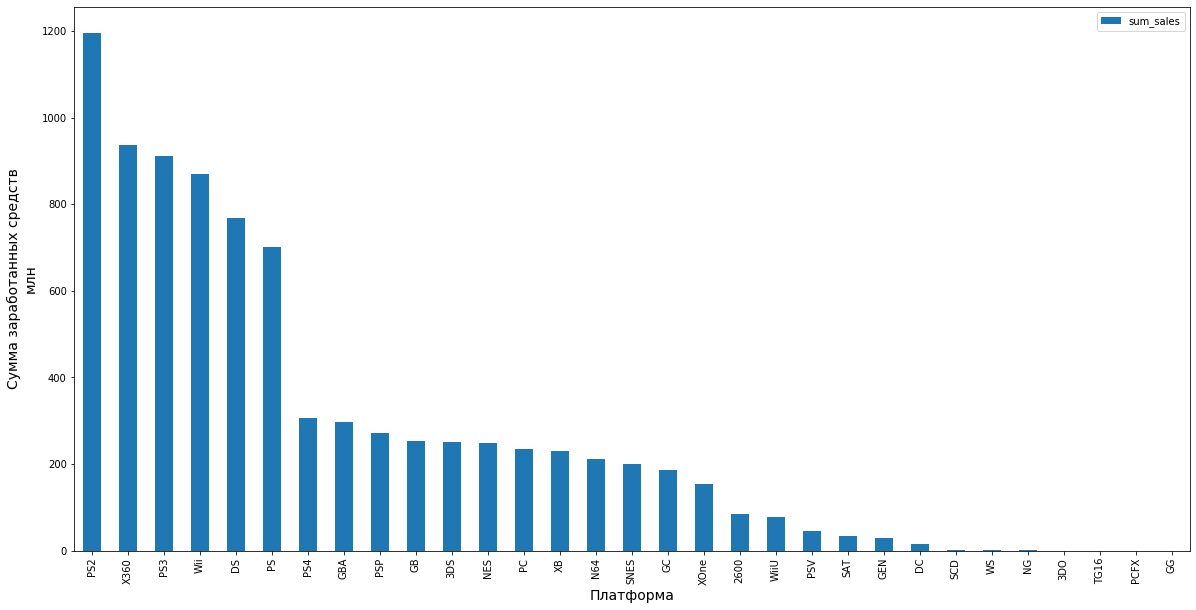

In [17]:
data_piv.plot(kind='bar',figsize = (20, 10))
plt.xlabel("Платформа", fontsize=14)
plt.ylabel("Сумма заработанных средств\nмлн", fontsize=14)

График показывает заработанные деньги той или иной платформой

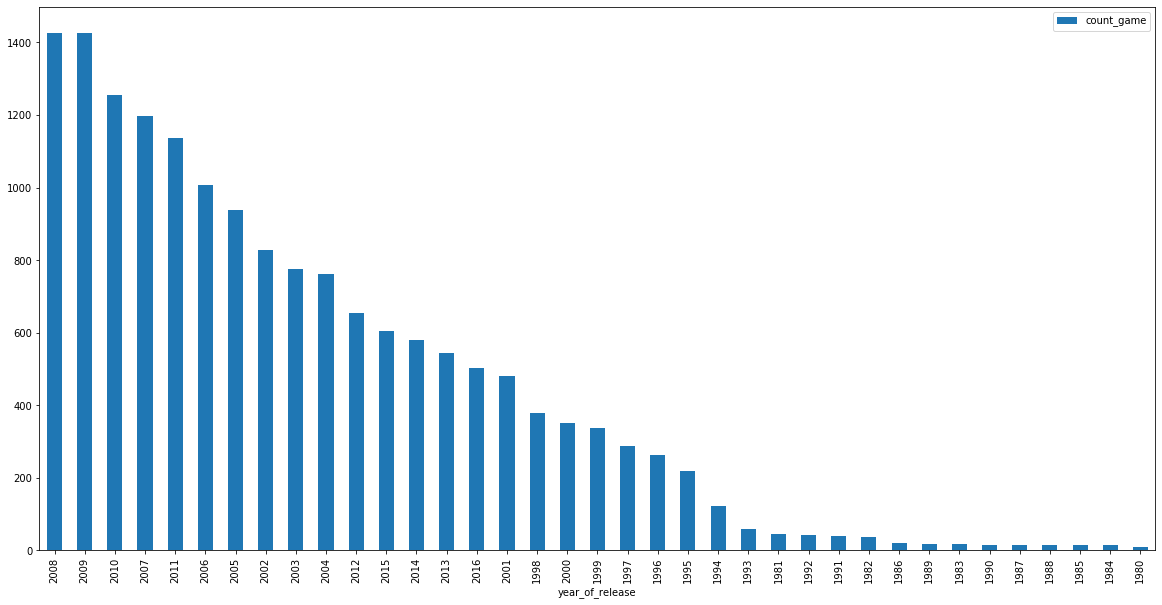

In [18]:
data_count_game = data.pivot_table(index = ['year_of_release'], values = ['name'], aggfunc = ['count'])
data_count_game.columns = ['count_game']
data_count_game.sort_values(by="count_game", ascending = False).plot(kind='bar',figsize = (20, 10))

Text(0.5, 1.0, 'Колличество проданных игр в год, в зависимости от платформы')

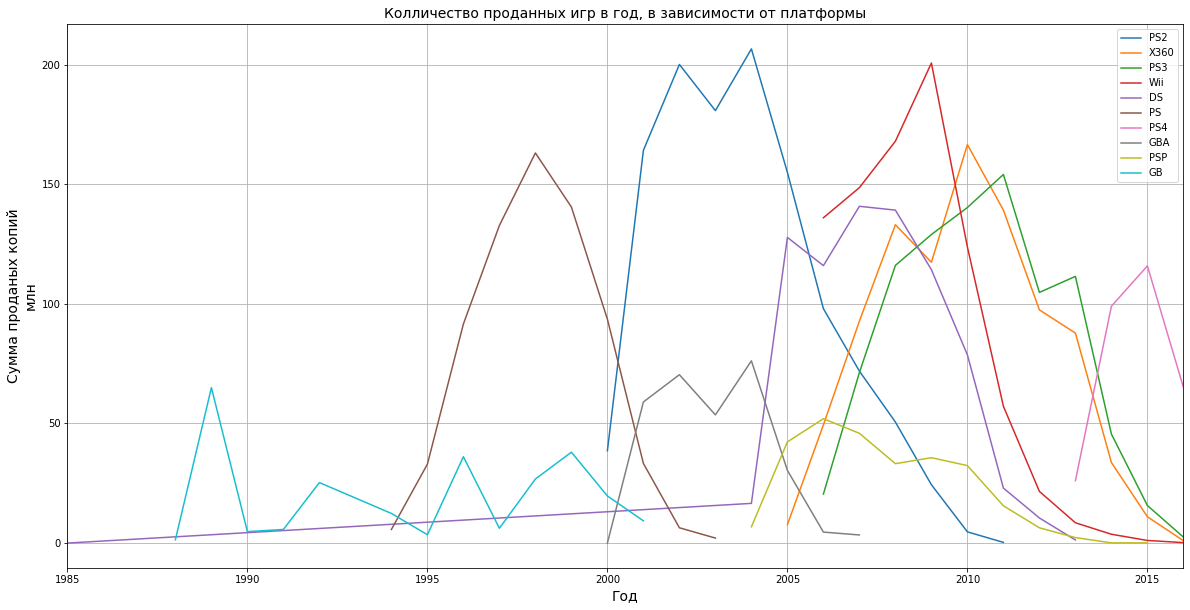

In [19]:
axis = data[data['platform'] == 'PS2'].pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(y = 'sum_sales',grid = True, style = '-', label = 'PS2', figsize = (20, 10), legend = True)
for i in data_piv.index[1:10]:
    data[data['platform'] == i].pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(y = 'sum_sales', grid = True, style = '-', label = i, ax = axis, legend = True)

plt.xlabel("Год", fontsize=14)
plt.ylabel("Сумма проданых копий\nмлн", fontsize=14)
plt.title('Колличество проданных игр в год, в зависимости от платформы', fontsize=14)

Text(0.5, 1.0, 'Колличество проданных игр в год, в зависимости от платформы')

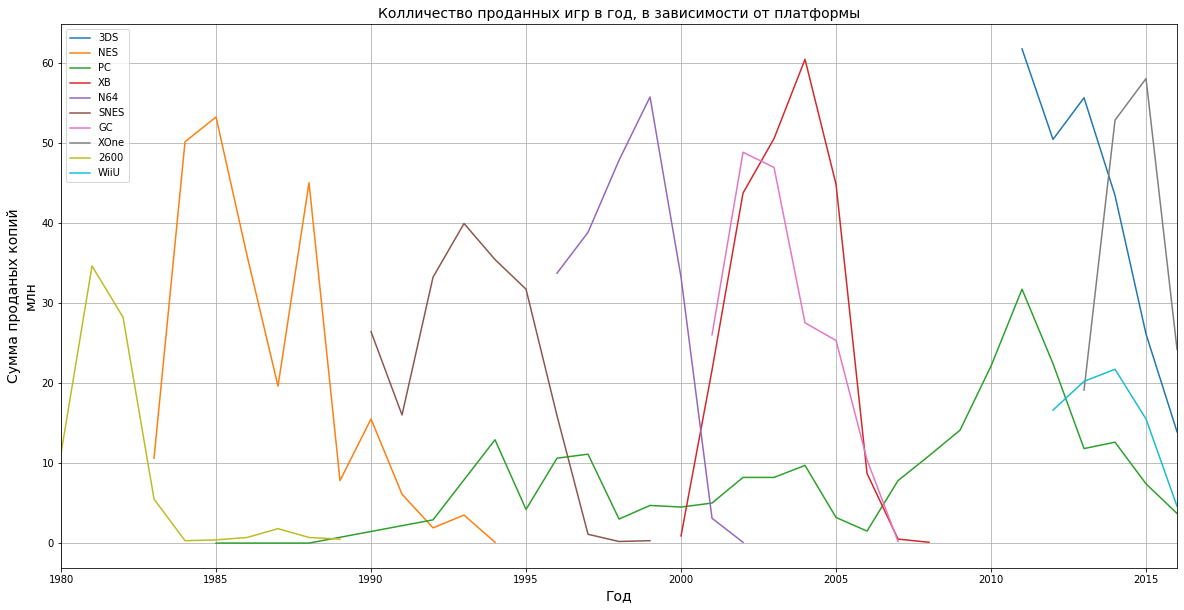

In [20]:
axis1 = data[data['platform'] == '3DS'].pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(y = 'sum_sales',grid = True, style = '-', label = '3DS', figsize = (20, 10), legend = True)
for i in data_piv.index[11:20]:
    data[data['platform'] == i].pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(y = 'sum_sales', grid = True, style = '-', label = i, ax = axis1, legend = True)

plt.xlabel("Год", fontsize=14)
plt.ylabel("Сумма проданых копий\nмлн", fontsize=14)
plt.title('Колличество проданных игр в год, в зависимости от платформы', fontsize=14)

Судя по исследованным данным, актуальными являются игры вышедшие после 2000 года. Возьмем данные за актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 

In [21]:
data_actual = data.query('year_of_release > 2000') # выборка по актуальным данным
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14120 entries, 0 to 16443
Data columns (total 12 columns):
name               14120 non-null object
platform           14120 non-null object
year_of_release    14120 non-null int64
genre              14120 non-null object
na_sales           14120 non-null float64
eu_sales           14120 non-null float64
jp_sales           14120 non-null float64
other_sales        14120 non-null float64
critic_score       7744 non-null float64
user_score         7264 non-null float64
rating             14120 non-null object
sum_sales          14120 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Сумма заработанных средств\nмлн')

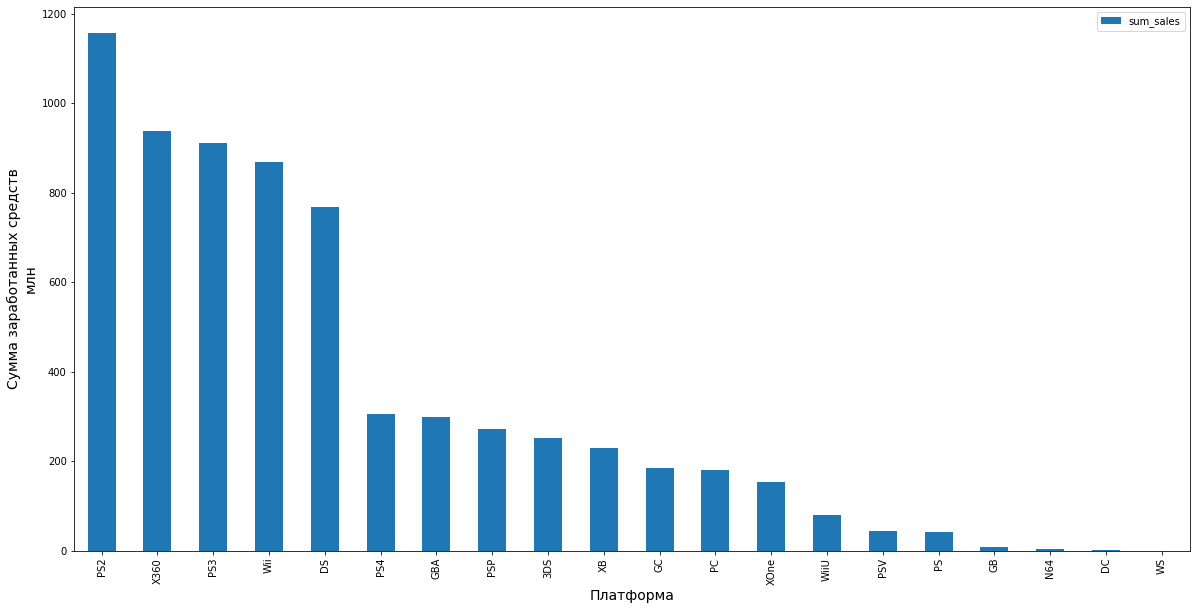

In [22]:
data_sum_sal = data_actual.pivot_table(index = ['platform'], values = ['sum_sales'], aggfunc = ['sum'])
data_sum_sal.columns = ['sum_sales']
data_sum_sal.sort_values(by="sum_sales", ascending = False).plot(kind='bar',figsize = (20, 10))
plt.xlabel("Платформа", fontsize=14)
plt.ylabel("Сумма заработанных средств\nмлн", fontsize=14)

График показывает заработанные средства по каждой из актуальных платформ

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

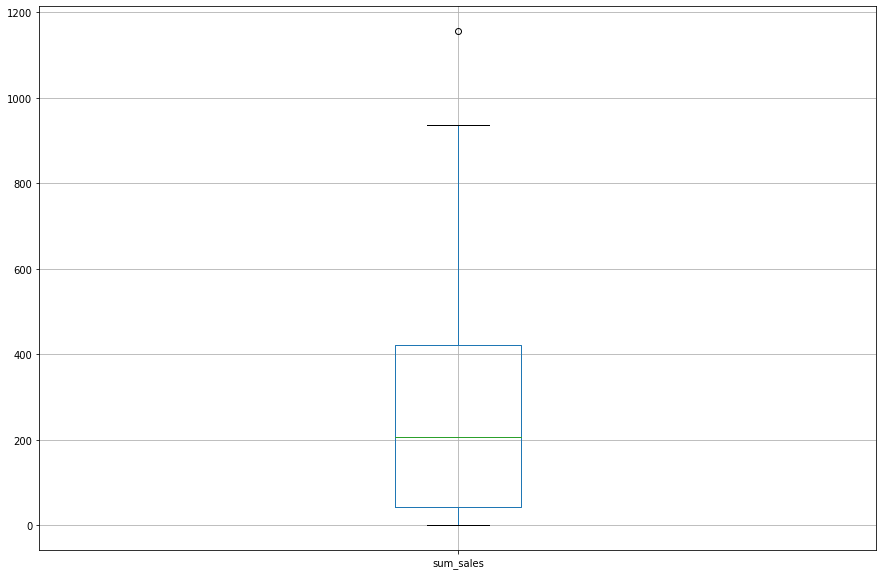

In [23]:
data_sum_sal.boxplot('sum_sales', figsize=(15, 10))

Построив график видно, что средняя продажа игр по платформам составляет 200 штук.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [24]:
data_PS2 = data_actual[data_actual['platform'] == 'PS2']
data_PS2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.4,0.4,0.4,10.6,95.0,9.0,M,20.8
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.4,5.5,0.5,1.8,95.0,8.7,M,16.2
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.8,5.1,1.9,1.2,95.0,8.4,E,15.0
38,Grand Theft Auto III,PS2,2001,Action,7.0,4.5,0.3,1.3,97.0,8.5,M,13.1
48,Gran Turismo 4,PS2,2004,Racing,3.0,0.0,1.1,7.5,89.0,8.5,E,11.6


Text(0, 0.5, 'Сумма продаж')

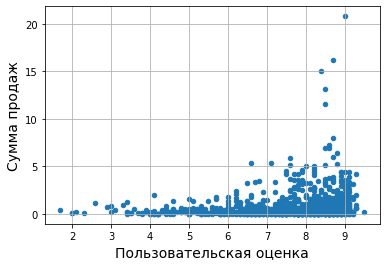

In [25]:
data_PS2.plot(x='user_score', y='sum_sales', kind='scatter',grid=True)
plt.xlabel("Пользовательская оценка", fontsize=14)
plt.ylabel("Сумма продаж", fontsize=14)

In [26]:
data_PS2['user_score'].corr(data_PS2['sum_sales'])

0.17196318589438073

Корреляция в 0.17 говорит о наличии слабой связи. То есть рейтинг пользователей не влияет на продажи

Text(0, 0.5, 'Сумма продаж')

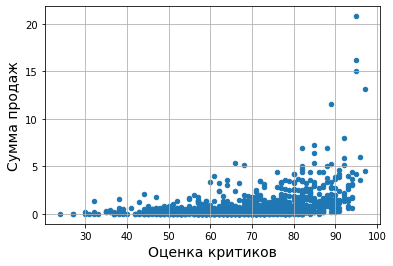

In [27]:
data_PS2.plot(x='critic_score', y='sum_sales', kind='scatter',grid=True)
plt.xlabel("Оценка критиков", fontsize=14)
plt.ylabel("Сумма продаж", fontsize=14)

In [28]:
data_PS2['critic_score'].corr(data_PS2['sum_sales'])

0.3944168239059008

Корреляция в 0.39 говорит о наличии связи, однако не слишком сильной. Не говорит о наличии прямой связи.

Соотнесите выводы с продажами игр на других платформах:

In [29]:
data_piv_pl=data_actual.pivot_table(index = 'platform', values = ['critic_score','user_score','sum_sales'],aggfunc={'critic_score':np.mean,'user_score':np.mean,'sum_sales':sum})
data_piv_pl

,critic_score,sum_sales,user_score
platform,,,
3DS,67.156627,251.1,6.852047
DC,84.750000,1.3,8.750000
DS,63.728814,768.2,7.022656
GB,NaN,9.3,NaN
GBA,67.311628,297.6,7.669323
GC,69.601831,185.1,7.615686
N64,NaN,3.2,NaN
PC,75.693997,180.3,7.025275
PS,66.725000,41.8,7.647368


In [30]:
for i in data_piv.index:
    data_i = data_actual[data_actual['platform'] == i]
    a=data_i['critic_score'].corr(data_i['sum_sales'])
    print("По критикам корреляция для платформы",i,'=',a)

По критикам корреляция для платформы PS2 = 0.3944168239059008
По критикам корреляция для платформы X360 = 0.3935204022157279
По критикам корреляция для платформы PS3 = 0.4352417782508607
По критикам корреляция для платформы Wii = 0.17772635750444254
По критикам корреляция для платформы DS = 0.23660372316320408
По критикам корреляция для платформы PS = 0.07222023673442801
По критикам корреляция для платформы PS4 = 0.40644116536825853
По критикам корреляция для платформы GBA = 0.2420556386014029
По критикам корреляция для платформы PSP = 0.31511045813280286
По критикам корреляция для платформы GB = nan
По критикам корреляция для платформы 3DS = 0.3496307137539301
По критикам корреляция для платформы NES = nan
По критикам корреляция для платформы PC = 0.25087674929853226
По критикам корреляция для платформы XB = 0.38477789992144656
По критикам корреляция для платформы N64 = nan
По критикам корреляция для платформы SNES = nan
По критикам корреляция для платформы GC = 0.32389974433641616
По

Изучив корреляции всех платформ, видно, что значение не поднимается выше 0.45, говорит о наличии связи, однако не слишком сильной. Прямой связи нет.

In [31]:
for i in data_piv.index:
    data_i = data_actual[data_actual['platform'] == i]
    a=data_i['user_score'].corr(data_i['sum_sales'])
    print("По игрокам корреляция для платформы",i,'=',a)

По игрокам корреляция для платформы PS2 = 0.17196318589438073
По игрокам корреляция для платформы X360 = 0.11473403276904934
По игрокам корреляция для платформы PS3 = 0.12860621020104063
По игрокам корреляция для платформы Wii = 0.11276152512855593
По игрокам корреляция для платформы DS = 0.12971733164861593
По игрокам корреляция для платформы PS = 0.03515472155809678
По игрокам корреляция для платформы PS4 = -0.03311301528027405
По игрокам корреляция для платформы GBA = 0.10763601631027937
По игрокам корреляция для платформы PSP = 0.21585337857517928
По игрокам корреляция для платформы GB = nan
По игрокам корреляция для платформы 3DS = 0.22388597553491293
По игрокам корреляция для платформы NES = nan
По игрокам корреляция для платформы PC = -0.008644585545424419
По игрокам корреляция для платформы XB = 0.17529024166355847
По игрокам корреляция для платформы N64 = nan
По игрокам корреляция для платформы SNES = nan
По игрокам корреляция для платформы GC = 0.22897630347952325
По игрокам 

Изучив корреляции всех платформ по игрокам, видно, что значение не поднимается выше 0.4, прямой связи нет. Однако есть и исключение платформа "DC" имеет очень сильную связь, но возможно по ней у нас слишком маленькая выборка.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [32]:
data_genre = data_actual.pivot_table(index = ['genre'], values = ['sum_sales'], aggfunc = ['sum'])
data_genre.columns = ['sum_sales']
data_genre.sort_values(by="sum_sales", ascending = False)

,sum_sales
genre,
Action,1438.7
Sports,1057.8
Shooter,883.7
Role-Playing,680.0
Misc,679.4
Racing,520.0
Platform,462.9
Simulation,317.4
Fighting,280.7


Text(0, 0.5, 'Сумма продаж в млн.')

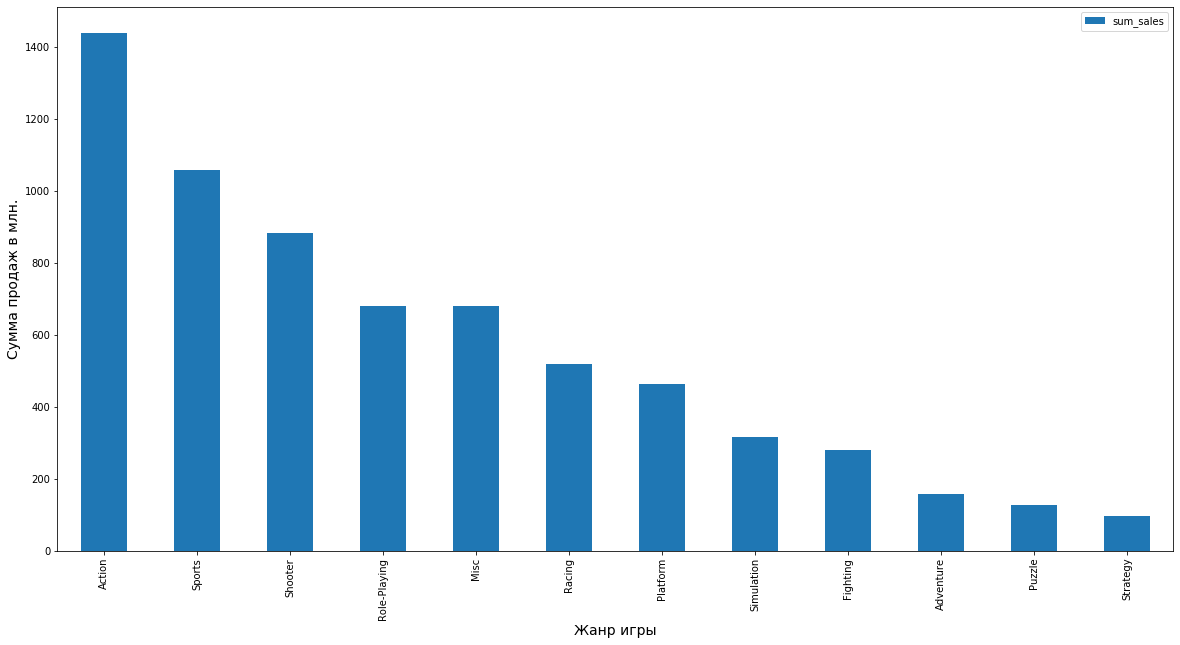

In [33]:
data_genre.sort_values(by="sum_sales", ascending = False).plot(kind='bar',figsize = (20, 10))
plt.xlabel("Жанр игры", fontsize=14)
plt.ylabel("Сумма продаж в млн.", fontsize=14)

Можно выделить, что самыми популярными играми по жанрам являются экшены, а самими низко продаваемыми стратегии.

In [34]:
data_genre_mean = data_actual.pivot_table(index = ['genre'], values = ['sum_sales'], aggfunc = ['mean'])
data_genre_mean.columns = ['mean_sales']
data_genre_mean.sort_values(by="mean_sales", ascending = False)

,mean_sales
genre,
Shooter,0.796844
Platform,0.665086
Sports,0.557323
Role-Playing,0.535012
Racing,0.524194
Action,0.474036
Fighting,0.459411
Misc,0.430818
Simulation,0.421514


Text(0, 0.5, 'Средние продажи в млн.')

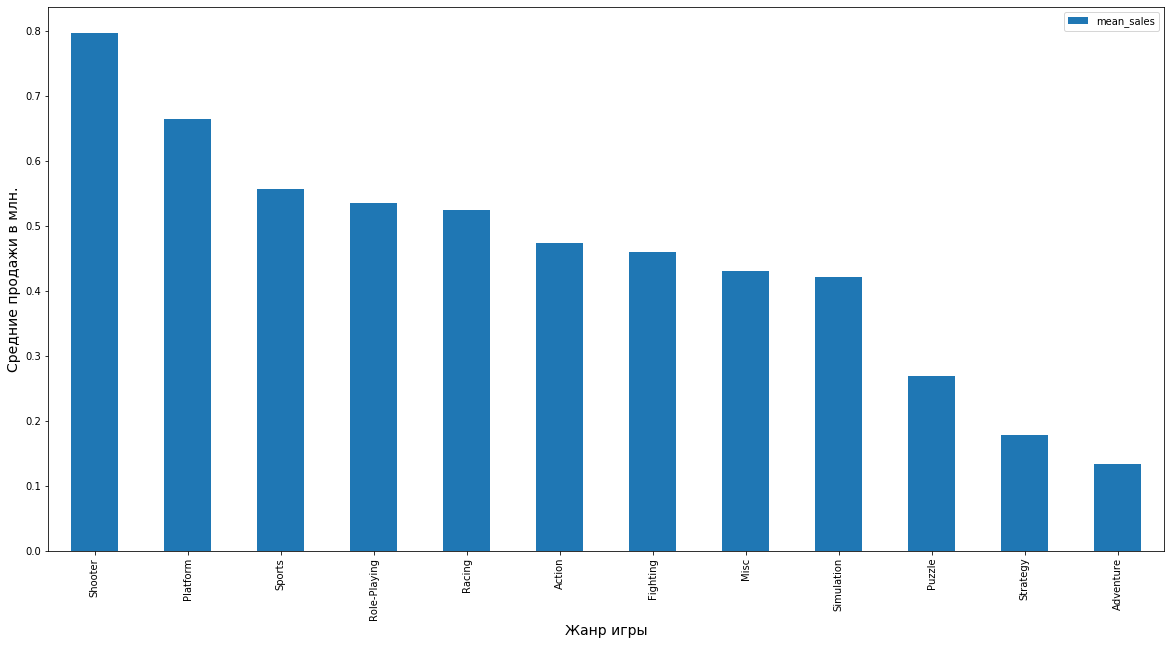

In [35]:
data_genre_mean.sort_values(by="mean_sales", ascending = False).plot(kind='bar',figsize = (20, 10))
plt.xlabel("Жанр игры", fontsize=14)
plt.ylabel("Средние продажи в млн.", fontsize=14)

Сравнив жанры по суммарным и средним продажам, можно заметить, что по общей сумме продаж лидируют экшены в то время как средний показатель говорит о предпочтении шутеров, а экшен находится аж на 6 месте. Можно предполжить, что среди жанра "Экшен" встречаются атрефакты, которые так влияют на статистику. Обратив внимание на жанр "Шутер" можно сказать о том что он стабильно приносит прибыль. Так что если есть желание создать новую игру стоит задуматься о просто стрелялке).

## Составим портрет для каждого региона (NA, EU, JP):

In [36]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.4,29.0,3.8,8.4,76.0,8.0,E,82.6
2,Mario Kart Wii,Wii,2008,Racing,15.7,12.8,3.8,3.3,82.0,8.3,E,35.6
3,Wii Sports Resort,Wii,2009,Sports,15.6,10.9,3.3,3.0,80.0,8.0,E,32.8
6,New Super Mario Bros.,DS,2006,Platform,11.3,9.1,6.5,2.9,89.0,8.5,E,29.8
7,Wii Play,Wii,2006,Misc,14.0,9.2,2.9,2.8,58.0,6.6,E,28.9


Самые популярные платформы (топ-5). Опишите различия в долях продаж:

In [37]:
reg = ["na_sales",'eu_sales','jp_sales']
for i in reg:
    data_i = data_actual.pivot_table(index = ['platform'], values = [i], aggfunc = ['sum'])
    data_i.columns = ['sum_sales']
    data_i=data_i.sort_values(by="sum_sales", ascending = False).head()
    print("Таблица по платформам для региона:",i,data_i)
    print()
    

Таблица по платформам для региона: na_sales           sum_sales
platform           
X360          595.6
PS2           550.3
Wii           484.2
PS3           388.1
DS            375.0

Таблица по платформам для региона: eu_sales           sum_sales
platform           
PS3           322.4
PS2           312.5
X360          261.3
Wii           253.5
DS            180.2

Таблица по платформам для региона: jp_sales           sum_sales
platform           
DS            167.6
PS2           121.4
3DS            99.5
PS3            73.2
PSP            67.5



Видно, что популярность платформ в каждом регионе отличается. В северной америке больше всего популярен Х360, в европе ПС3, в Японии DS. Доли продаж всех платформ больше всего в северной америке.

Самые популярные жанры (топ-5):

In [38]:
for i in reg:
    data_i = data_actual.pivot_table(index = ['genre'], values = [i], aggfunc = ['sum'])
    data_i.columns = [i]
    data_i=data_i.sort_values(by=i, ascending = False).head()
    print("Таблица по жанрам для региона:",i)
    print(data_i)
    print()

Таблица по жанрам для региона: na_sales
              na_sales
genre                 
Action           727.1
Sports           563.7
Shooter          486.3
Misc             355.1
Role-Playing     272.6

Таблица по жанрам для региона: eu_sales
         eu_sales
genre            
Action      440.3
Sports      319.0
Shooter     284.5
Misc        185.6
Racing      178.5

Таблица по жанрам для региона: jp_sales
              jp_sales
genre                 
Role-Playing     220.5
Action           118.0
Misc              79.3
Sports            66.3
Platform          51.4



В каждом регионе в топ 5 входят такие жанры как: Экшен, Шутер, Спорт, Музыкальный. Только в Японии самым популярным жанром являются ролевые игры. По нашей выборке можно сделать вывод, что мир предпочитает активные игры (экшены, шутеры, спортивные,музыкальные).

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
for i in reg:
    data_i = data_actual.pivot_table(index = ['rating'], values = [i], aggfunc = ['sum'])
    data_i.columns = [i]
    data_i=data_i.sort_values(by=i, ascending = False)
    print("Таблица по жанрам для региона:",i)
    print(data_i)
    print()

Таблица по жанрам для региона: na_sales
        na_sales
rating          
E         1214.8
M          722.8
T          678.7
RP         437.4
E10+       341.3

Таблица по жанрам для региона: eu_sales
        eu_sales
rating          
E          652.3
M          461.9
T          357.2
RP         308.5
E10+       175.1

Таблица по жанрам для региона: jp_sales
        jp_sales
rating          
RP         335.4
E          184.2
T          117.2
M           52.6
E10+        37.6



In [40]:
data_piv_rating = data_actual.pivot_table(index = ['rating'], values = ["na_sales",'eu_sales','jp_sales'], aggfunc = ['sum'])
data_piv_rating

sum                  
       eu_sales jp_sales na_sales
rating                           
E         652.3    184.2   1214.8
E10+      175.1     37.6    341.3
M         461.9     52.6    722.8
RP        308.5    335.4    437.4
T         357.2    117.2    678.7

- E -рейтинг для всех, 
- М - для взрослых;
- Т - для подростков;
- E10+ - для детей от 10 лет;
- RP - ожидается уточнения.

Больше всего продаж у рейтинга Е (для всех), меньше всех у рейтинга Е10+ (для детей от 10 лет) для каждого региона.

## Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Но: Средние пользовательские рейтинги платформ Xbox One и PC не различаются с вероятностью 95%. Н1: соответственно различаются.

In [41]:
data_actuall = data_actual.dropna(subset=["user_score"]).reset_index(drop=True) 

In [42]:
data_actuall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 12 columns):
name               7264 non-null object
platform           7264 non-null object
year_of_release    7264 non-null int64
genre              7264 non-null object
na_sales           7264 non-null float64
eu_sales           7264 non-null float64
jp_sales           7264 non-null float64
other_sales        7264 non-null float64
critic_score       6710 non-null float64
user_score         7264 non-null float64
rating             7264 non-null object
sum_sales          7264 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 681.1+ KB


In [43]:
variance_X = np.var(data_actuall[data_actuall['platform'] == 'XOne']['user_score'],ddof=1)
variance_X # дписперсия выборки по ХОne

1.9069968429360695

In [44]:
variance_PC = np.var(data_actuall[data_actuall['platform'] == 'PC']['user_score'],ddof=1)
variance_PC # дписперсия выборки по РС

2.317434587420832

Дисперсии не равны(параметр совокупностей разные),учтем это при проверке гипотезы:

In [45]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(data_actuall[data_actuall['platform'] == 'XOne']['user_score'], data_actuall[data_actuall['platform'] == 'PC']['user_score'], equal_var = False)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу',results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу',results.pvalue)

Отвергаем нулевую гипотезу 2.2075890056219328e-05


Но: среднее одной совокупности равно среднему другой с вероятностью 95%. Н1: соответственно не равно.

In [46]:
variance_A = np.var(data_actuall[data_actuall['genre'] == 'Action']['user_score'],ddof=1)
variance_A # дписперсия выборки по жанра Экшен

2.004512311062291

In [47]:
variance_S = np.var(data_actuall[data_actuall['genre'] == 'Sports']['user_score'],ddof=1)
variance_S # дписперсия выборки жанра Спорт

2.63490943283214

Дисперсии не равны(параметр совокупностей разные),учтем это при проверке гипотезы:

In [48]:
results = st.ttest_ind(data_actuall[data_actuall['genre'] == 'Action']['user_score'], data_actuall[data_actuall['genre'] == 'Sports']['user_score'],equal_var = False)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу',results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу',results.pvalue)

Не получилось отвергнуть нулевую гипотезу 0.07686681371741208


## Вывод

Вывод
Проведен анализ данных по продажам игр с 1980 по 2016 года. Анализирую данные пришли к выводу, что с выходом новых платформ постепенно затухают старые, и можно спрогнозировать что в 2017 году рынок захватят ХOne, PS4, WiiU. При этом также не сложно спрогнозировать, какие платформы будут выбраны в каждом регионе. При анализе, можно заметить, что по сути рейтинги пользователей никак не влияют на продажи, впрочем рейтинге критиков совсем чуть чуть влияют на продажи. Самые популярные жанры экшн и шутеры. На западе любят спортвные симуляторы, а в японии ролевые игры.